## ANGELES, KHATRINA B.
## BSCS 2A
## CSEL 302 - MID TERMS EXAMINATION





---



---



**Diabetes Dataset**



• Description: Comprises diagnostic measurements for a set of patients diagnosed with diabetes.



• Use Case: Suitable for both Linear Regression (predicting a quantitative measure of disease
progression) and Logistic Regression (classifying patients into categories based on diagnostic
measurements)



---



---





1. IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix


2. DATASET LOADING AND EXPLONATORY DATA ANALYSIS

In [ ]:
data = pd.read_csv('diabetes.csv')
print(data.head())
print(data.isnull().sum())
print(data.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
       Pregnancies  

**Dependent Variable:** Outcome

**Independent Variable:**

Pregnancies
Glucose level,
Blood pressure,
Skin thickness,
Insulin level,
BMI,
Diabetes Pedigree Function,
Age

3.DATA VISUALIATION

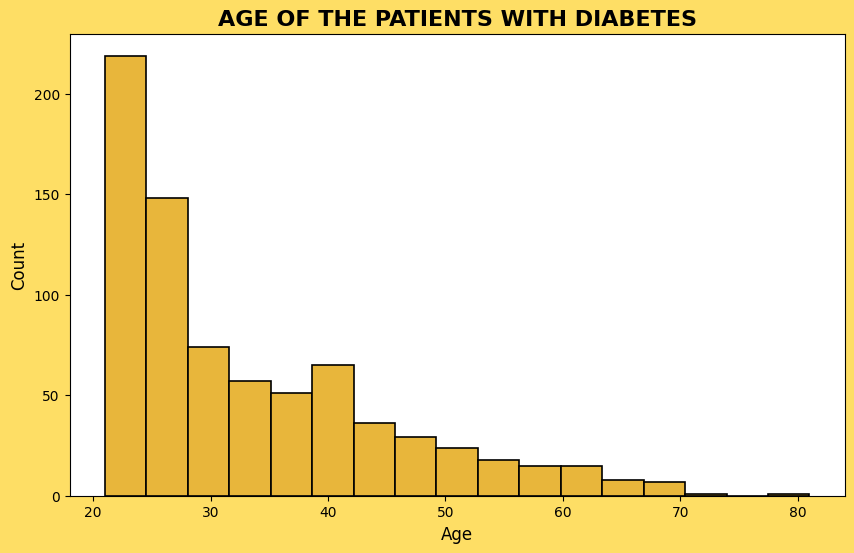

In [ ]:
plt.figure(facecolor='#FEDE65', figsize=(10, 6))

sns.histplot(data['Age'], color='#E8B63B', edgecolor='black', linewidth=1.2, alpha=1)

plt.title('AGE OF THE PATIENTS WITH DIABETES', color='black', fontsize=16, fontweight='bold')
plt.xlabel('Age', color='black', fontsize=12)
plt.ylabel('Count', color='black', fontsize=12)

plt.grid(False)
plt.show()

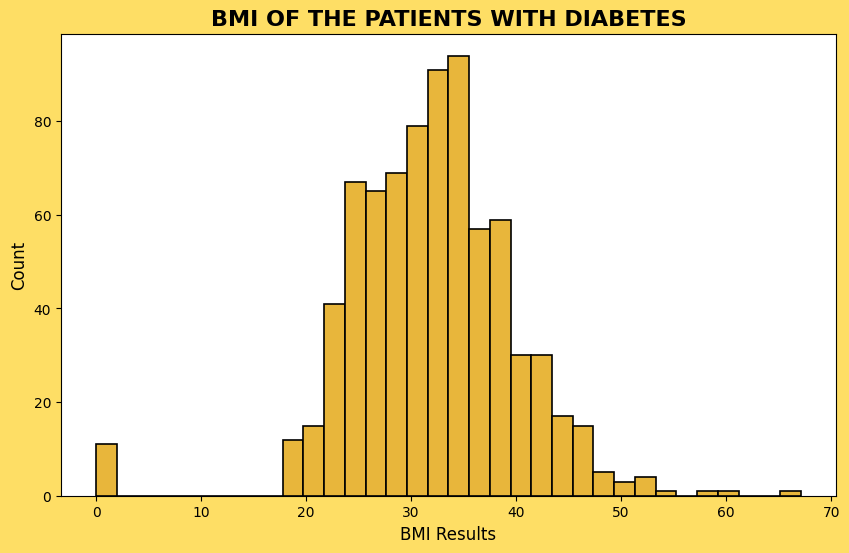

In [ ]:
plt.figure(facecolor='#FEDE65', figsize=(10, 6))

sns.histplot(data['BMI'], color='#E8B63B', edgecolor='black', linewidth=1.2, alpha=1)

plt.title('BMI OF THE PATIENTS WITH DIABETES', color='black', fontsize=16, fontweight='bold')
plt.xlabel('BMI Results', color='black', fontsize=12)
plt.ylabel('Count', color='black', fontsize=12)

plt.grid(False)

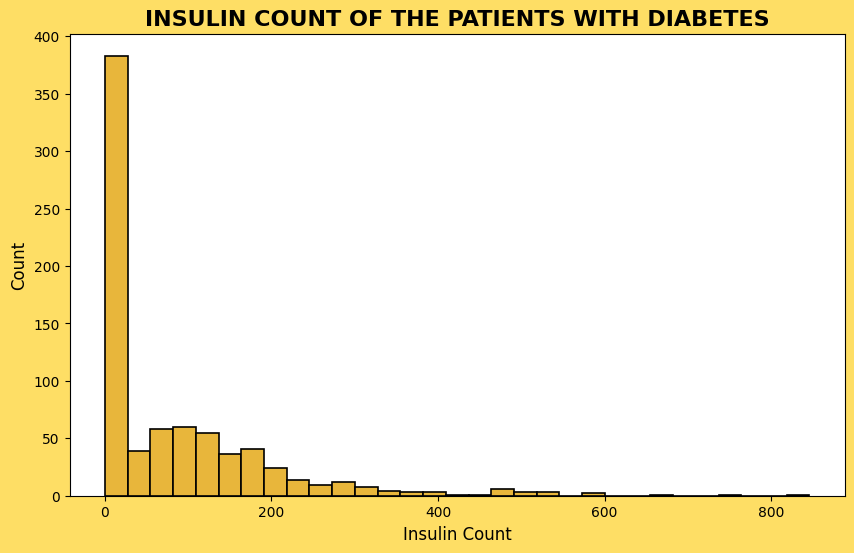

In [ ]:
plt.figure(facecolor='#FEDE65', figsize=(10, 6))

sns.histplot(data['Insulin'], color='#E8B63B', edgecolor='black', linewidth=1.2, alpha=1)

plt.title('INSULIN COUNT OF THE PATIENTS WITH DIABETES', color='black', fontsize=16, fontweight='bold')
plt.xlabel('Insulin Count', color='black', fontsize=12)
plt.ylabel('Count', color='black', fontsize=12)

plt.grid(False)

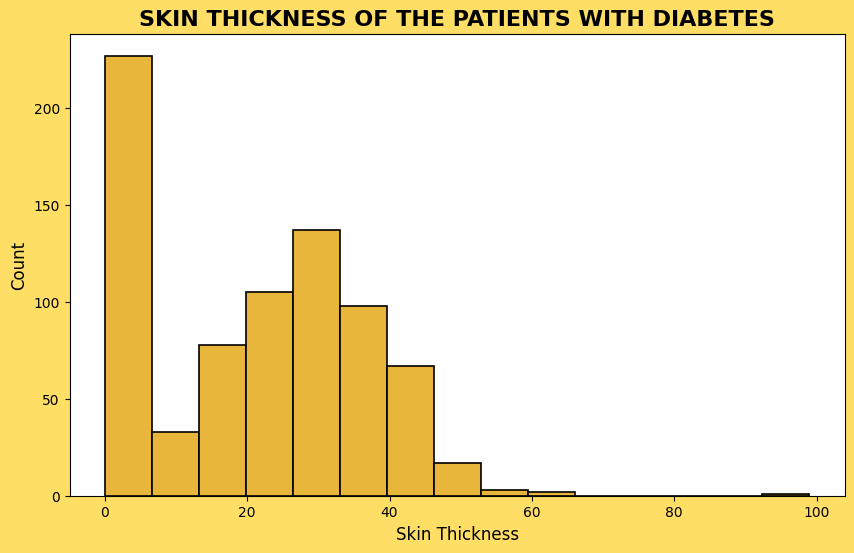

In [ ]:
plt.figure(facecolor='#FEDE65', figsize=(10, 6))

sns.histplot(data['SkinThickness'], color='#E8B63B', edgecolor='black', linewidth=1.2, alpha=1)

plt.title('SKIN THICKNESS OF THE PATIENTS WITH DIABETES', color='black', fontsize=16, fontweight='bold')
plt.xlabel('Skin Thickness', color='black', fontsize=12)
plt.ylabel('Count', color='black', fontsize=12)

plt.grid(False)

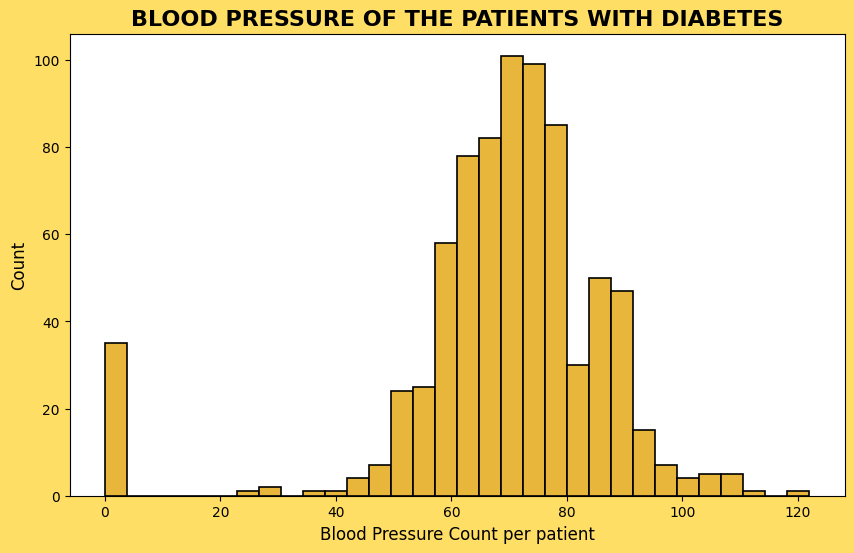

In [ ]:
plt.figure(facecolor='#FEDE65', figsize=(10, 6))

sns.histplot(data['BloodPressure'], color='#E8B63B', edgecolor='black', linewidth=1.2, alpha=1)

plt.title('BLOOD PRESSURE OF THE PATIENTS WITH DIABETES', color='black', fontsize=16, fontweight='bold')
plt.xlabel('Blood Pressure Count per patient', color='black', fontsize=12)
plt.ylabel('Count', color='black', fontsize=12)

plt.grid(False)

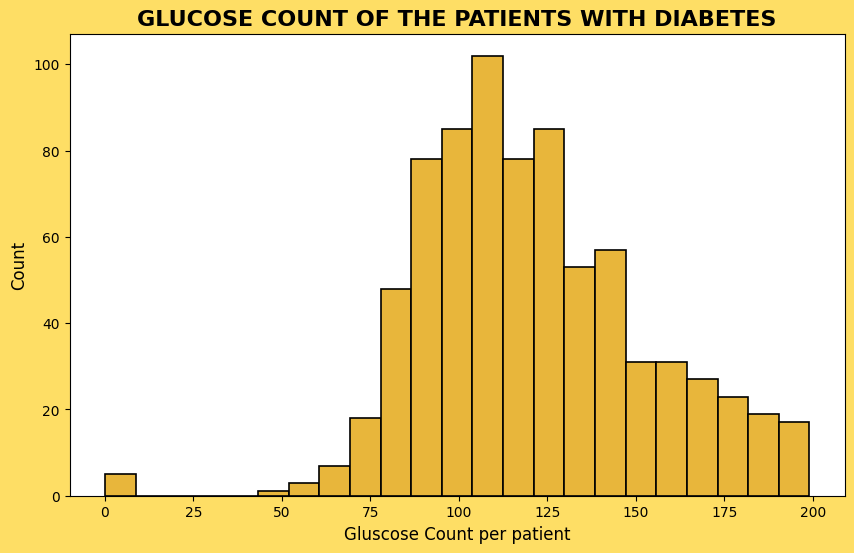

In [ ]:
plt.figure(facecolor='#FEDE65', figsize=(10, 6))

sns.histplot(data['Glucose'], color='#E8B63B', edgecolor='black', linewidth=1.2, alpha=1)

plt.title('GLUCOSE COUNT OF THE PATIENTS WITH DIABETES', color='black', fontsize=16, fontweight='bold')
plt.xlabel('Gluscose Count per patient', color='black', fontsize=12)
plt.ylabel('Count', color='black', fontsize=12)

plt.grid(False)

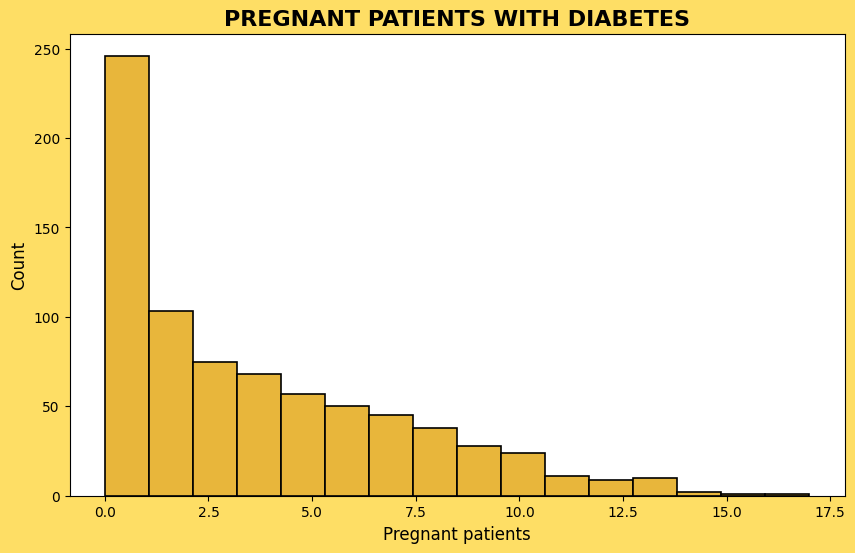

In [ ]:
plt.figure(facecolor='#FEDE65', figsize=(10, 6))

sns.histplot(data['Pregnancies'], color='#E8B63B', edgecolor='black', linewidth=1.2, alpha=1)

plt.title('PREGNANT PATIENTS WITH DIABETES', color='black', fontsize=16, fontweight='bold')
plt.xlabel('Pregnant patients', color='black', fontsize=12)
plt.ylabel('Count', color='black', fontsize=12)

plt.grid(False)

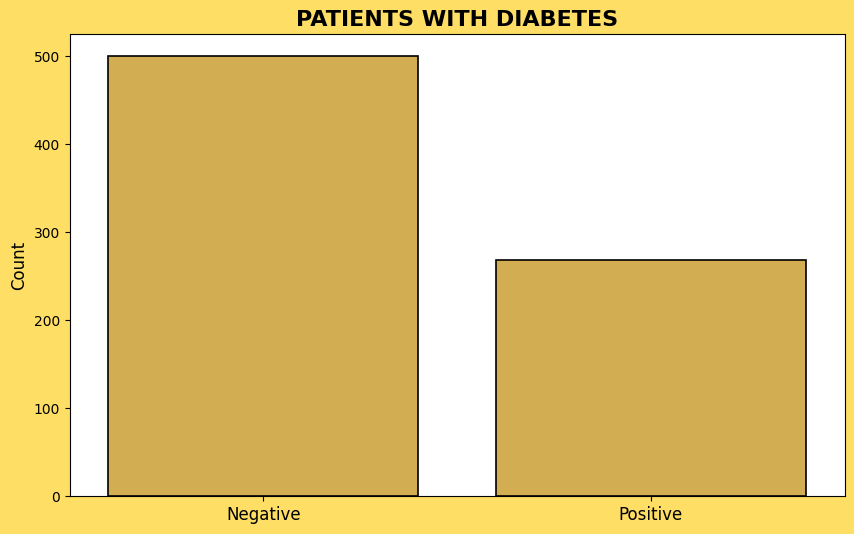

In [ ]:
plt.figure(facecolor='#FEDE65', figsize=(10, 6))

sns.countplot(x='Outcome', data=data, color='#E8B63B', edgecolor='black', linewidth=1.2, alpha=1)


plt.xticks([1, 0], ['Positive', 'Negative'], color='black', fontsize=12)
plt.title('PATIENTS WITH DIABETES', color='black', fontsize=16, fontweight='bold')
plt.xlabel('', color='black', fontsize=12)
plt.ylabel('Count', color='black', fontsize=12)

plt.grid(False)
plt.show()

4. DATA PREPROCESSING

In [ ]:
a_imputer = SimpleImputer(strategy='most_frequent')
b_imputer = SimpleImputer(strategy='median')

In [ ]:
cat_features = ['BMI', 'Insulin', 'SkinThickness', 'BloodPressure', 'Glucose', 'Pregnancies']
num_features = ['Age']

x_cat = data[cat_features]
x_num = data[num_features]

x_cat = pd.get_dummies(x_cat, drop_first=True)
x_num = num_imputer.fit_transform(x_num)

x = np.concatenate([x_num, x_cat], axis=1)
y = data['Outcome']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

5. LINEAR REGRESSION

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

y_pred_lin = lin_reg.predict(x_test)

print('\nLinear Regression Metrics:')
print('\nCoefficients:', lin_reg.coef_)
print('\nIntercept:', lin_reg.intercept_)
print('\nMean Squared Error:', mean_squared_error(y_test, y_pred_lin))
print('\nR-squared:', r2_score(y_test, y_pred_lin))


Linear Regression Metrics:

Coefficients: [ 0.07578062  0.11827    -0.0303045   0.01327457 -0.04283475  0.18437816
  0.03306337]

Intercept: 0.34690553745928315

Mean Squared Error: 0.17604237052057464

R-squared: 0.23323767506594129


6. LOGISTIC REGRESSION

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

y_pred_log = log_reg.predict(x_test)
y_prob = log_reg.predict_proba(x_test)[:, 1]

print('\nLogistic Regression Metrics:')
print('\nAccuracy:', accuracy_score(y_test, y_pred_log))
print('\nPrecision:', precision_score(y_test, y_pred_log))
print('\nRecall:', recall_score(y_test, y_pred_log))
print('\nF1-Score:', f1_score(y_test, y_pred_log))


Logistic Regression Metrics:

Accuracy: 0.7272727272727273

Precision: 0.6140350877192983

Recall: 0.6363636363636364

F1-Score: 0.625


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

print('ROC AUC:', auc)

ROC AUC: 0.7985307621671259


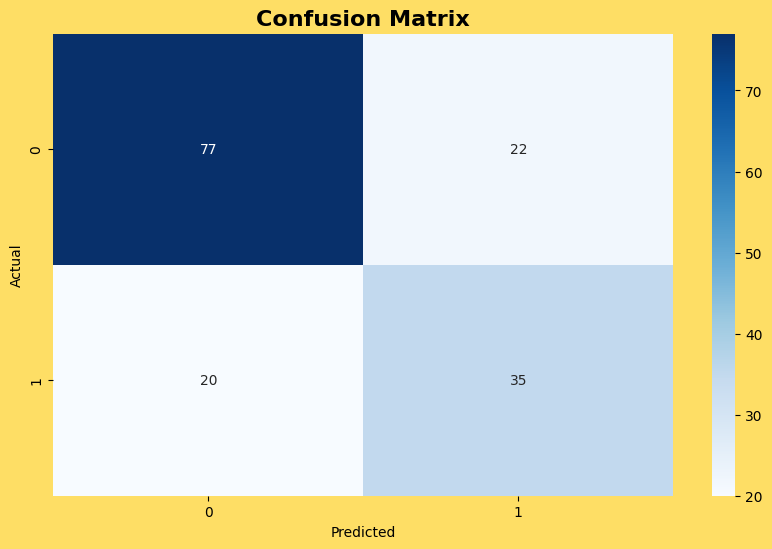

In [ ]:
cm = confusion_matrix(y_test, y_pred_log)

plt.figure(facecolor='#FEDE65', figsize=(10, 6))

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()

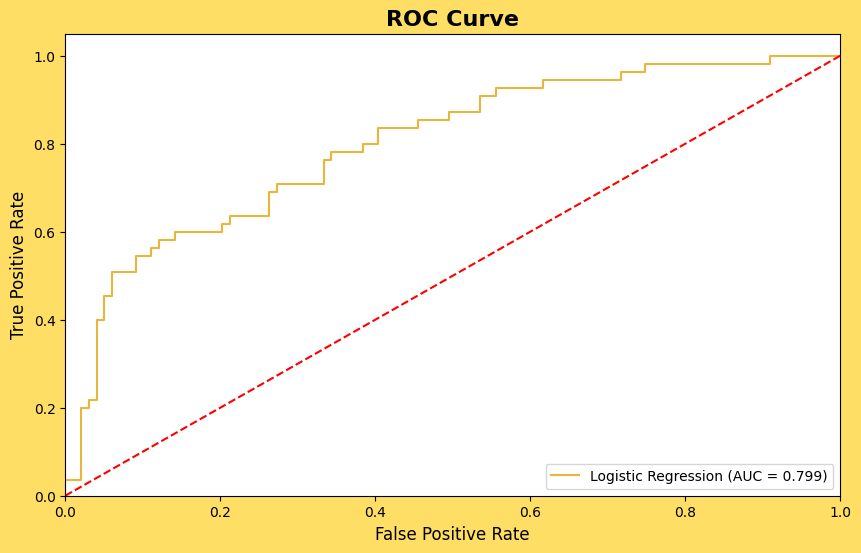

In [ ]:
plt.figure(facecolor='#FEDE65', figsize=(10, 6))

plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.3f})', color='#E8B63B')
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])


plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)

plt.title('ROC Curve', fontsize=16, fontweight='bold')
plt.legend(loc="lower right")

plt.show()

7. LINEAR AND LOGISTIC REGRESSION ACCURACY COMPARISON

In [ ]:
print('\nLinear Regression R-squared:', r2_score(y_test, y_pred_lin))
print('\nLogistic Regression Accuracy:', accuracy_score(y_test, y_pred_log))


Linear Regression R-squared: 0.23323767506594129

Logistic Regression Accuracy: 0.7272727272727273
